In [1]:
### @author     Peitsa Rautio
### @version    01.08.2024

# Summary:

# This .ipynb program imports exported Fluidit format data, builds a pandapipes
# network model and exports it as JSON to ./data/models/.

# In general, dashes in raw node names are converted to underscores due to
# Python syntax not supporting dashes in variable names.
# Dash is strictly an operator type in Python.

# Pandapipes and Pandapower © Copyright 2020-2024 by Fraunhofer Institute for
# Energy Economics and Energy System Technology (IEE), Kassel,
# and University of Kassel.

In [2]:
# Optional: check if venv is activated

import sys

def is_venv():
    return (hasattr(sys, 'real_prefix') or
            (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix))

if is_venv():
    print('inside virtualenv or venv')
else:
    print('outside virtualenv or venv')

inside virtualenv or venv


In [3]:
import pandas as pd
import pandapipes as pp
import numpy as np

## Simulation variables and options

# Ambient temperature [K] = t[C] + 273.15
temp_ext_c = 20
temp_ext_k = temp_ext_c + 273.15

# Initial network fluid temperature (flow side) [K] = t[C] + 273.15
t_net_flow_init_c = 85
t_net_flow_init_k = t_net_flow_init_c + 273.15

# Initial network fluid temperature (return side) [K] = t[C] + 273.15
t_net_return_init_c = 35
t_net_return_init_k = t_net_return_init_c + 273.15

# Initial junction and network pressure, flow side [bar]
net_flow_p_bar = 10

# Initial junction and network pressure, return side [bar]
net_return_p_bar = 8

In [4]:
## Import data from Data.xls into Pandas dataframes

# Define data file path
sourcefile = './data/Data.xlsx'

# Import data
df_heater = pd.read_excel(sourcefile, sheet_name=0)
df_sink = pd.read_excel(sourcefile, sheet_name=1)
df_connection = pd.read_excel(sourcefile, sheet_name=2)
df_nodetype = pd.read_excel(sourcefile, sheet_name=3)

# Prepare blank network for elements
net = pp.create_empty_network(name="Data", fluid="water")

In [5]:
## Create pandapipes junctions from imported data.
# Creates separate networks for supply and return lines. Supply and return
# lines join at sinks and heat sources.

# Get number of nodes from dataframe
num_nodes = len(df_nodetype)

# tracker tracks number of junctions created
junction_tracker = 0

# Iterate over all nodes to find and create junctions
for i in range(num_nodes):

    if df_nodetype.at[i, 'Node Type'] == "Junction":
        
        # Replace dashes with underscores to conform with Python markup
        junction_name = str(df_nodetype.at[i, 'Name']).replace("Junction-",
                                                               "Junction_")
        
        junction_pos_x = float(df_nodetype.at[i, 'X-Coordinate'])
        junction_pos_y = float(df_nodetype.at[i, 'Y-Coordinate'])
        junction_pos_flow = (junction_pos_x, junction_pos_y)
        junction_pos_return = (junction_pos_x, junction_pos_y-100)

        # Define supply and return flow network junctions
        globals()['%s_supply' % junction_name] = pp.create_junction(net,
            pn_bar=net_flow_p_bar,
            tfluid_k=t_net_flow_init_k,
            geodata=junction_pos_flow,
            name=junction_name + '_supply')
        globals()['%s_return' % junction_name] = pp.create_junction(net,
            pn_bar=net_return_p_bar,
            tfluid_k=t_net_return_init_k,
            geodata=junction_pos_return,
            name=junction_name + '_return')

        junction_tracker += 2

print("Number of junctions created:", junction_tracker)

# List junctions
net.junction

Number of junctions created: 1588


name  pn_bar  tfluid_k  height_m  in_service      type
0        Junction_165_supply    10.0    358.15       0.0        True  junction
1        Junction_165_return     8.0    308.15       0.0        True  junction
2        Junction_300_supply    10.0    358.15       0.0        True  junction
3        Junction_300_return     8.0    308.15       0.0        True  junction
4        Junction_897_supply    10.0    358.15       0.0        True  junction
5        Junction_897_return     8.0    308.15       0.0        True  junction
6        Junction_907_supply    10.0    358.15       0.0        True  junction
7        Junction_907_return     8.0    308.15       0.0        True  junction
8        Junction_909_supply    10.0    358.15       0.0        True  junction
9        Junction_909_return     8.0    308.15       0.0        True  junction
10       Junction_916_supply    10.0    358.15       0.0        True  junction
11       Junction_916_return     8.0    308.15       0.0        True  junction
12       Junction_917_supply    10.0    358.15       0.0        True  junction
13       Junction_917_return     8.0    308.15       0.0        True  junction
14       Junction_919_supply    10.0    358.15       0.0        True  junction
15       Junction_919_return     8.0    308.15       0.0        True  junction
16       Junction_920_supply    10.0    358.15       0.0        True  junction
17       Junction_920_return     8.0    308.15       0.0        True  junction
18       Junction_942_supply    10.0    358.15       0.0        True  junction
19       Junction_942_return     8.0    308.15       0.0        True  junction
20       Junction_954_supply    10.0    358.15       0.0        True  junction
21       Junction_954_return     8.0    308.15       0.0        True  junction
22       Junction_998_supply    10.0    358.15       0.0        True  junction
23       Junction_998_return     8.0    308.15       0.0        True  junction
24      Junction_1036_supply    10.0    358.15       0.0        True  junction
25      Junction_1036_return     8.0    308.15       0.0        True  junction
26      Junction_1044_supply    10.0    358.15       0.0        True  junction
27      Junction_1044_return     8.0    308.15       0.0        True  junction
28      Junction_1143_supply    10.0    358.15       0.0        True  junction
29      Junction_1143_return     8.0    308.15       0.0        True  junction
30      Junction_1395_supply    10.0    358.15       0.0        True  junction
31      Junction_1395_return     8.0    308.15       0.0        True  junction
32      Junction_1396_supply    10.0    358.15       0.0        True  junction
33      Junction_1396_return     8.0    308.15       0.0        True  junction
34      Junction_1455_supply    10.0    358.15       0.0        True  junction
35      Junction_1455_return     8.0    308.15       0.0        True  junction
36      Junction_1457_supply    10.0    358.15       0.0        True  junction
37      Junction_1457_return     8.0    308.15       0.0        True  junction
38      Junction_1459_supply    10.0    358.15       0.0        True  junction
39      Junction_1459_return     8.0    308.15       0.0        True  junction
40      Junction_1461_supply    10.0    358.15       0.0        True  junction
41      Junction_1461_return     8.0    308.15       0.0        True  junction
42      Junction_1470_supply    10.0    358.15       0.0        True  junction
43      Junction_1470_return     8.0    308.15       0.0        True  junction
44      Junction_1471_supply    10.0    358.15       0.0        True  junction
45      Junction_1471_return     8.0    308.15       0.0        True  junction
46      Junction_1472_supply    10.0    358.15       0.0        True  junction
47      Junction_1472_return     8.0    308.15       0.0        True  junction
48      Junction_1475_supply    10.0    358.15       0.0        True  junction
49      Junction_1475_return     8.0    308.15       0.0        True  junc

> &#9658; Information on multiple source heating network models

JanStock1 commented on Feb 26 2024

Hello everyone,
I would like to comment on this issue as I came up with the same problem of several producers in a district heating network. The solution proposed by @cvTHM worked well for me (additional producers modelled by heat_exchanger and flow_controller). However, since the heat supply and the mass flow are prescribed in this modelling approach (interpreted as base load producer), the supply temperature at these producers is not fixed but depends on the return temperature (temperature difference is fixed). Therefore, the supply temperature at such a producer varies depending on the return temperature, i.e. on the load situation in the district heating network. Thus, the supply temperature at the producers modelled with heat_exchanger and flow_controller is quite low at some load times.

I have tested an alternative approach that ensures a constant supply temperature at the additional producers, but the actual heat supply at these producers differs slightly from the calculated value.
The first producer in the district heating network is still modelled as a circ_pump_pressure component. The circ_pump_mass component, which prescribes a certain mass flow, can be used (since pandapipes 0.9.0) to specify the temperature at the supply node of additional producers. A heat flow can be calculated using the specified mass flow and the known design temperature difference between supply and return (later more on that). The pressure at the supply node of the circ_pump_mass component must be specified, otherwise there may be no mass flow at the supply node (depending on the pressure conditions in the network). However, if a pressure value is set at the supply nodes of the additional producers (circ_pump_mass) and at the first producer (circ_pump_pressure), the resulting mass flow in the network may not be as desired, as the mass flow follows the fixed pressure conditions in the network. Therefore, a flow_controller is required downstream of the supply node of a circ_pump_mass component, which regulates the pressure conditions and ensures the desired mass flow, which is also set to the circ_pump_mass component but is not yet reached due to the first producer, i.e. the fixed pressure at the circ_pump_pressure component.

The main advantage of this proposed modelling approach (circ_pump_mass and flow_controller) is that the supply temperature at the additional producers can be set. However, as the return temperature at the producers is not known in advance, but the supply temperature and the mass flow are specified, the actually supplied heat at these producers deviates slightly from the calculated value. By varying the set mass flows at the producers depending on the supply condition and the estimated heat losses in the network, the actually supplied heat can be approximated to the aimed value.

In [6]:
## Create pandapipes source nodes

# See markdown notes above for information on multiple producer networks.

# Raw source heater values are given as kW [J/s * 10^3], pp circ_pump_mass
# uses mass flow mkg/s, use conversion ratio variable to adjust.

# Conversion ratio from raw data, denotes average ratio between base demand
# [kW] and base demand [kg/s].  Assumes ~50 K / kg of energy heat difference
# between flow and return networks (210.4648 * 10^3 J/kg / 4190 J/kg ~= 50).
e_flow_conv_ratio = (7 / 0.033 + 40.3 / 0.193) / 2 # = 210.4648

# Output water temperature [K] = t[C] + 273.15
t_out_c = 90
t_out_k = t_out_c + 273.15

# Pressure at flow side of producers [bar]
source_flow_bar = 10

# Pressure lift induced by sources [bar] - Used to model pressure difference
# at pump nodes between input and output
pressure_lift = 3

# Production multiplier - general multiplier for testing effects of increasing/
# reducing heated water production. Multiplier applies to mdot_flow_kg_per_s
prod_multiplier = 1

# Get source connections and create source nodes
for i in range(len(df_heater)):
    
    if str(df_heater.iloc[i,0]) != "Ericsson": # Ericsson special case below
        source_name = str(df_heater.iloc[i,0])

        for j in range(len(df_connection)):
            
            if str(df_connection.at[j, 'Start Node']) == source_name:
                
                source_flow = globals()[str(df_connection.at[j, 'End Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_supply']
                
                source_return = globals()[str(df_connection.at[j, 'End Node'])
                                          .replace("Junction-", "Junction_") +
                                          '_return']
                
                pp.create_circ_pump_const_pressure(
                    net,
                    flow_junction=source_flow,
                    return_junction=source_return,
                    plift_bar=pressure_lift,
                    p_flow_bar=source_flow_bar,
                    mdot_flow_kg_per_s=pd.to_numeric(df_heater.iloc[i,2])/
                                                    e_flow_conv_ratio,
                    t_flow_k=t_out_k,
                    name=source_name)
        
            elif str(df_connection.at[j, 'End Node']) == source_name:

                source_flow = globals()[str(df_connection.at[j, 'Start Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_supply']
                
                source_return = globals()[str(df_connection.at[j, 'Start Node'])
                                          .replace("Junction-", "Junction_") +
                                          '_return']
                
                pp.create_circ_pump_const_pressure(
                    net,
                    flow_junction=source_flow,
                    return_junction=source_return,
                    plift_bar=pressure_lift,
                    p_flow_bar=source_flow_bar,
                    mdot_flow_kg_per_s=pd.to_numeric(df_heater.iloc[i,2])*
                                                    e_flow_conv_ratio,
                    t_flow_k=t_out_k,
                    name=source_name)

# Ericsson special case: Ericsson has only return connections;
# Ericsson set as a slack node in the network.

# Create auxiliary junction to connect to Ericsson

globals()['Ericsson_connection'] = pp.create_junction(
                                    net, pn_bar=net_return_p_bar,
                                    tfluid_k=t_net_return_init_k,
                                    name='Ericsson_connection')

# Tracker for Ericsson auxiliary junction connections
e_pipe_tracker = 0

for i in range(len(df_connection)):

    if str(df_connection.at[i, 'Start Node']) == 'Ericsson':
                
        connection_name = globals()[str(df_connection.at[i, 'End Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_return']

        pp.create_pipe_from_parameters(net,
            from_junction=connection_name,
            to_junction=Ericsson_connection,
            length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
            diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
            u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
            text_k=int(temp_ext_k),
            name='Pipe_E_' + str(e_pipe_tracker)
            )
        
        e_pipe_tracker += 1
        
    elif str(df_connection.at[i, 'End Node']) == 'Ericsson':

        connection_name = globals()[str(df_connection.at[i, 'Start Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_return']

        pp.create_pipe_from_parameters(net,
            from_junction=connection_name,
            to_junction=Ericsson_connection,
            length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
            diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
            k_mm=.05,
            u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
            text_k=int(temp_ext_k),
            name='Pipe_E_' + str(i)
            )
        
        e_pipe_tracker += 1

# Create Ericsson slack node

Ericsson = pp.create_ext_grid(net,
                              junction=Ericsson_connection,
                              p_bar=net_return_p_bar,
                              t_k=t_net_return_init_k,
                              name="Ericsson Ext. Grid")


# List sources
net.circ_pump_pressure

name  return_junction  flow_junction  p_flow_bar  t_flow_k  \
0      Sarfvik              171            170        10.0    363.15   
1  Kirkkonummi               75             74        10.0    363.15   

   plift_bar  in_service type  mdot_flow_kg_per_s  
0        3.0        True   pt        1.900556e+02  
1        3.0        True   pt        4.209295e+06

In [7]:
## Create pandapipes sink nodes

# Desired return water temperature [K] = t[C] + 273.15
# Use t_return_c = t_net_return_init_c to set to initial network temp
t_return_c = t_net_return_init_c + 5
t_return_k = t_return_c + 273.15

# Get number of sinks and connections
num_sinks = len(df_sink)
num_connections = len(df_connection)

# Tracker tracks number of sinks created
sink_tracker = 0

# Iterate over number of raw data rows to find and create sinks
for i in range(num_sinks):

    sink_get = str(df_sink.at[i, 'Name'])

    # Get sink details
    for j in range(num_sinks):
        if df_sink.at[j, 'Name'] == sink_get:
            sink_type = str(df_sink.at[j, 'Category'])
            sink_priority = int(str(df_sink.at[j, 'Priority']))
            sink_demand_kW = float(str(df_sink.at[j, 'Base Demand [kW]']))
            mdot_kg_per_s_demand = float(str(df_sink.at[j, 'Base Demand [kg/s]']))
            sink_x = float(str(df_sink.at[j, 'X-Coordinate']))
            sink_y = float(str(df_sink.at[j, 'Y-Coordinate']))

    # Get connecting junction and pipe diameter
    for k in range(num_connections):
        if df_connection.at[k, "End Node"] == sink_get:
            sink_source = globals()[str(df_connection.at[k, 'Start Node']).
                                    replace("Junction-", "Junction_") + '_supply']
            sink_return = globals()[str(df_connection.at[k, 'Start Node']).
                                    replace("Junction-", "Junction_") + '_return']
            connection_d_mm = float(str(df_connection.at[k, 'Diameter [mm]']))
            mdot_kg_per_s_capacity = float(str(df_connection.at[k, 'Capacity [kg/s]']))

    sink_name = sink_get.replace("Junction-", "Sink_")

    # Define sink
    pp.create_heat_consumer(net,
                            from_junction=sink_source,
                            to_junction=sink_return,
                            diameter_m=connection_d_mm/1000,
                            qext_w=sink_demand_kW*1000,
                            # controlled_mdot_kg_per_s=mdot_kg_per_s_capacity,
                            controlled_mdot_kg_per_s=mdot_kg_per_s_demand,
                            # deltat_k=50,
                            # treturn_k=t_return_k,
                            name=sink_name, type=sink_type,
                            x = sink_x, y = sink_y)
        
    sink_tracker += 1

print("Number of sinks created:", sink_tracker)
net.heat_consumer

Number of sinks created: 496


name  from_junction  to_junction        qext_w  \
0           Sink_129107           1556         1557  0.000000e+00   
1           Sink_127293           1470         1471  6.150000e+04   
2           Sink_127222           1458         1459  6.633300e+04   
3           Sink_128285           1464         1465  4.763300e+04   
4           Sink_128595           1546         1547  6.280000e+04   
5           Sink_128600           1544         1545  5.776700e+04   
6           Sink_128440           1542         1543  1.680000e+04   
7           Sink_129109           1558         1559  5.866700e+04   
8           Sink_129149           1566         1567  8.350000e+04   
9           Sink_129272           1580         1581  4.810000e+04   
10          Sink_129285           1572         1573  7.423300e+04   
11          Sink_127340           1476         1477  9.700000e+04   
12          Sink_127302           1474         1475  8.543300e+04   
13          Sink_128333           1454         1455  7.546700e+04   
14          Sink_128334           1454         1455  9.150000e+04   
15          Sink_128253           1454         1455  1.400000e+04   
16          Sink_127650           1538         1539  9.456700e+04   
17          Sink_128286           1464         1465  5.693300e+04   
18          Sink_128233           1532         1533  2.930000e+04   
19          Sink_128231           1530         1531  4.033300e+04   
20          Sink_128433           1540         1541  7.000000e+03   
21          Sink_122930            454          455  7.166670e+05   
22   Neidonkallio_EMP_2            728          729  6.000000e+04   
23   Neidonkallio_EMP_1            574          575  1.200000e+04   
24        Kummihovi_EMP            686          687  1.770000e+05   
25          Kantvik_EMP            686          687  6.400000e+04   
26           Sink_99936           1114         1115  5.000000e+03   
27           Sink_99902           1032         1033  1.100000e+04   
28           Sink_99881           1260         1261  4.000000e+03   
29           Sink_99878            778          779  9.000000e+03   
30           Sink_99877           1258         1259  6.000000e+03   
31           Sink_99875           1256         1257  5.000000e+03   
32           Sink_99873           1254         1255  4.000000e+03   
33           Sink_99871           1252         1253  6.000000e+03   
34           Sink_99866           1034         1035  2.633300e+04   
35           Sink_99827           1244         1245  6.000000e+03   
36           Sink_99822             32           33  8.300000e+05   
37           Sink_99819            956          957  1.200000e+05   
38           Sink_99818            956          957  1.090000e+05   
39           Sink_99803           1162         1163  6.933300e+04   
40           Sink_99794           1144         1145  6.100000e+04   
41           Sink_99790           1140         1141  1.673330e+05   
42           Sink_99757           1234         1235  6.000000e+03   
43           Sink_99727            838          839  1.130000e+05   
44           Sink_99701            838          839  2.600000e+04   
45           Sink_99668           1220         1221  3.200000e+04   
46           Sink_99655            322          323  1.200000e+04   
47           Sink_99653           1218         1219  8.100000e+04   
48           Sink_99647           1218         1219  8.133300e+04   
49           Sink_99645           1034         1035  1.100000e+04   
50           Sink_99635           1216         1217  8.633300e+04   
51           Sink_99632           1214         1215  5.000000e+03   
52           Sink_99628           1210         1211  6.000000e+03   
53           Sink_99627           1210         1211  4.000000e+03   
54           Sink_99625           1194         1195  6.000000e+03   
55           Sink_99613           1136         1137  7.000000e+03   
56           Sink_99598            528          529  8.800000e+04   
57          Sink_

In [8]:
## Create pipe connections

# Defines pipe connections between junctions. Source and sink connections
# are defined at heat pump node and heat exchanger creation.

# Tracker tracks number of pipes created
pipe_tracker = 0

# Concatenate source and sink names to single NumPy array
np_heaters_sinks = pd.concat([df_heater[['Name']], df_sink[['Name']]]).to_numpy()
num_heaters_sinks = len(np_heaters_sinks)

for i in range(num_connections):
    
    pipe_get = str(df_connection.at[i, 'Name']).replace("-", "_")

    start_node = str(df_connection.at[i, 'Start Node'])
    end_node = str(df_connection.at[i, 'End Node'])

    if str(df_connection.at[i, 'Has Supply Line']) == 'True': supply_line = True
    else: supply_line = False
    if str(df_connection.at[i, 'Has Return Line']) == 'True': return_line = True
    else: return_line = False
 
    # Exclude source and sink node connections (defined earlier)
    if start_node not in np_heaters_sinks and end_node not in np_heaters_sinks:
            
        # Create supply line pipe
        if supply_line == True:
            
            pipe_from = globals()[str(df_connection.at[i, 'Start Node']).
                                  replace("Junction-", "Junction_") + '_supply']
            pipe_to = globals()[str(df_connection.at[i, 'End Node']).
                                replace("Junction-", "Junction_") + '_supply']
            pipe_name = pipe_get + '_supply'

            pp.create_pipe_from_parameters(net,
                from_junction=pipe_from,
                to_junction=pipe_to,
                length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
                diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
                k_mm=.05,
                u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
                sections=5,
                text_k=int(temp_ext_k),
                name=pipe_name
                )
            pipe_tracker += 1
        
        # Create return line pipe
        if return_line == True:

            pipe_from = globals()[str(df_connection.at[i, 'End Node']).
                replace("Junction-", "Junction_") + '_return']
            pipe_to = globals()[str(df_connection.at[i, 'Start Node']).
                replace("Junction-", "Junction_") + '_return']
            pipe_name = pipe_get + '_return'

            pp.create_pipe_from_parameters(net,
                from_junction=pipe_from,
                to_junction=pipe_to,
                length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
                diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
                u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
                text_k=int(temp_ext_k),
                name=pipe_name,
                sections=5,
                k_mm=.05
                )
            pipe_tracker += 1

print("Number of pipes created: ", pipe_tracker)
net.pipe

Number of pipes created:  1581


name  from_junction  to_junction std_type  length_km  \
0              Pipe_E_97            201         1588     None    0.12795   
1            Pipe_E_1064           1345         1588     None    0.00484   
2        Pipe_862_supply             10            8     None    0.01001   
3        Pipe_862_return              9           11     None    0.01001   
4        Pipe_865_supply             14           16     None    0.00039   
5        Pipe_865_return             17           15     None    0.00039   
6        Pipe_867_supply             10           14     None    0.09491   
7        Pipe_867_return             15           11     None    0.09491   
8        Pipe_938_supply             22           20     None    0.00400   
9        Pipe_938_return             21           23     None    0.00400   
10       Pipe_973_supply             24           10     None    0.03326   
11       Pipe_973_return             11           25     None    0.03326   
12       Pipe_975_supply             24            6     None    0.00108   
13       Pipe_975_return              7           25     None    0.00108   
14      Pipe_1324_supply             30           32     None    0.03698   
15      Pipe_1324_return             33           31     None    0.03698   
16      Pipe_1382_supply             34           38     None    0.02323   
17      Pipe_1382_return             39           35     None    0.02323   
18      Pipe_1385_supply             38           36     None    0.00159   
19      Pipe_1385_return             37           39     None    0.00159   
20      Pipe_1394_supply             38           40     None    0.00353   
21      Pipe_1394_return             41           39     None    0.00353   
22      Pipe_1398_supply             44           42     None    0.00148   
23      Pipe_1398_return             43           45     None    0.00148   
24      Pipe_1435_supply             56           54     None    0.00650   
25      Pipe_1435_return             55           57     None    0.00650   
26      Pipe_1437_supply             54           58     None    0.00554   
27      Pipe_1437_return             59           55     None    0.00554   
28      Pipe_1441_supply             40           60     None    0.00332   
29      Pipe_1441_return             61           41     None    0.00332   
30      Pipe_1867_supply             52           44     None    0.03421   
31      Pipe_1867_return             45           53     None    0.03421   
32      Pipe_1875_supply             56           52     None    0.00108   
33      Pipe_1875_return             53           57     None    0.00108   
34      Pipe_1876_supply             50           56     None    0.00149   
35      Pipe_1876_return             57           51     None    0.00149   
36      Pipe_1880_supply             48           50     None    0.00232   
37      Pipe_1880_return             51           49     None    0.00232   
38      Pipe_1881_supply             34           44     None    0.00635   
39      Pipe_1881_return             45           35     None    0.00635   
40      Pipe_1911_return             69           67     None    0.00002   
41      Pipe_1923_supply             72          122     None    0.06922   
42      Pipe_1923_return            123           73     None    0.06922   
43      Pipe_1941_supply             72           74     None    0.00482   
44      Pipe_1941_return             75           73     None    0.00482   
45      Pipe_1988_supply            328           78     None    0.00047   
46      Pipe_1992_supply            324           80     None    0.00207   
47      Pipe_2003_return            333           87     None    0.00506   
48      Pipe_2004_supply            320          322     None    0.05990   
49      Pipe_2004_return            323          321     None    0.05990   
50      Pipe_2017_supply             88           76     None    0.03391   
51      Pipe_2017_return             77           89     None    0.0

In [9]:
net.pipe.name

0                Pipe_E_97
1              Pipe_E_1064
2          Pipe_862_supply
3          Pipe_862_return
4          Pipe_865_supply
5          Pipe_865_return
6          Pipe_867_supply
7          Pipe_867_return
8          Pipe_938_supply
9          Pipe_938_return
10         Pipe_973_supply
11         Pipe_973_return
12         Pipe_975_supply
13         Pipe_975_return
14        Pipe_1324_supply
15        Pipe_1324_return
16        Pipe_1382_supply
17        Pipe_1382_return
18        Pipe_1385_supply
19        Pipe_1385_return
20        Pipe_1394_supply
21        Pipe_1394_return
22        Pipe_1398_supply
23        Pipe_1398_return
24        Pipe_1435_supply
25        Pipe_1435_return
26        Pipe_1437_supply
27        Pipe_1437_return
28        Pipe_1441_supply
29        Pipe_1441_return
30        Pipe_1867_supply
31        Pipe_1867_return
32        Pipe_1875_supply
33        Pipe_1875_return
34        Pipe_1876_supply
35        Pipe_1876_return
36        Pipe_1880_supply
3

The following junctions cannot be displayed, as there is no geodata available: {1588}
No coords found for pipes {0, 1}. Junction geodata is missing for those pipes!


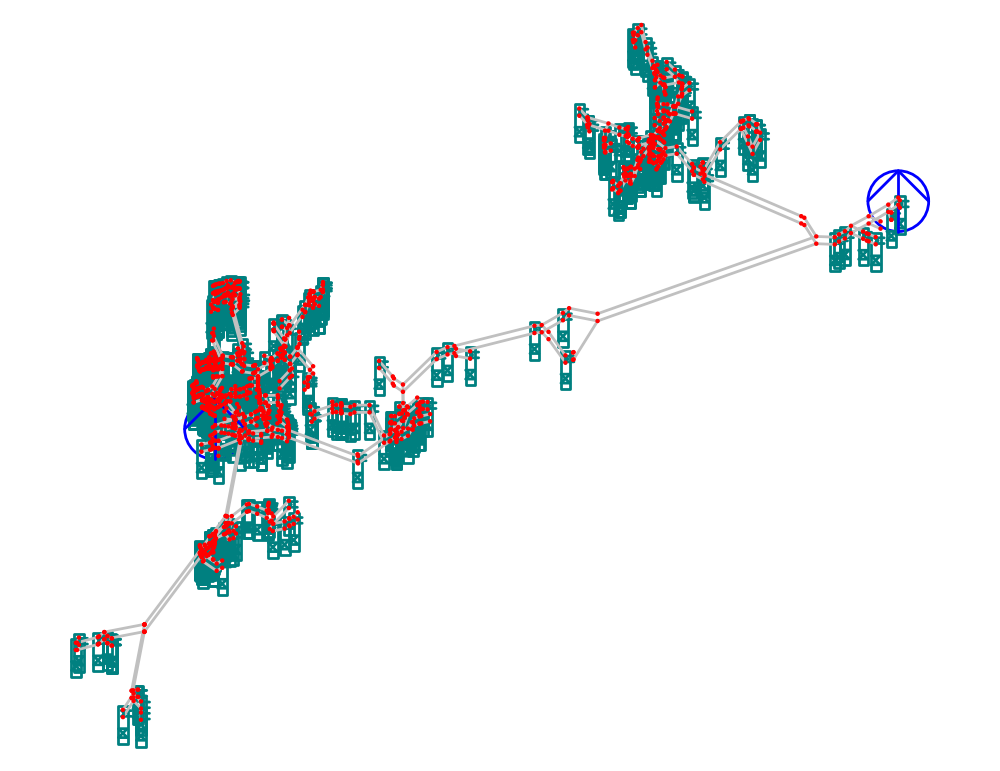

<Axes: >

In [10]:
## Code for inspecting elements and debugging

# net.junction.loc(Junction_1000_return)

# Plotting

import pandapipes.plotting as plot

plot.simple_plot(net, plot_sinks=True, plot_sources=True,
                 junction_size=0.2, heat_consumer_size=0.5,
                 heat_consumer_color='Teal', pump_size=0.5,
                 pump_color='Blue')

In [11]:
## Run pipeflow

pp.pipeflow(net, mode='bidirectional') # Modes = sequential, bidirectional

net.res_heat_consumer # Modes = res_heat_consumer, res_junction, res_pipe, res_circ_pump_pressure

v_mean_m_per_s  p_from_bar  p_to_bar    t_from_k      t_to_k  \
0          0.000000    9.575549  7.559429         NaN         NaN   
1          0.201233    9.975184  7.042008  362.778392  312.748893   
2          0.135742    9.333650  7.801665  362.053257  311.678141   
3          0.058584    9.438190  7.696522  362.165626  312.132382   
4          0.128512    9.207893  7.975588  361.593324  311.500696   
5          0.118213    9.207621  7.975915  361.501977  311.464676   
6          0.054971    9.622695  7.509556  362.754128  312.130606   
7          0.191963    9.575549  7.559429  361.817140  311.781766   
8          0.273218    9.451385  7.683074  362.192399  312.159318   
9          0.098431    9.396775  7.737797  362.484702  312.347541   
10         0.151909    9.141236  7.996813  362.373678  312.001755   
11         0.198498    9.877945  7.210300  363.084803  310.533530   
12         0.174828    9.865422  7.231955  363.077964  310.526915   
13         0.154434    9.574360  7.560266  362.238707  312.205909   
14         0.187243    9.574360  7.560266  362.238707  312.205909   
15         0.028649    9.574360  7.560266  362.238707  312.205909   
16         0.193520    9.395290  7.739476  362.360502  312.328449   
17         0.070022    9.438190  7.696522  362.165626  312.132382   
18         0.095872    9.385819  7.750382  362.089009  312.053673   
19         0.131973    9.385807  7.750397  362.086825  312.053099   
20         0.052383    9.333572  7.801797  359.172749  309.121204   
21         0.062977    9.338505  7.886402  362.961061  311.623401   
22         0.196325    9.214989  7.953426  362.348106  311.962572   
23         0.089799    9.178677  7.992771  361.677174  311.601570   
24         0.362208    9.173949  8.060138  358.990446  308.937785   
25         0.130968    9.173949  8.060138  358.990446  308.937785   
26         0.003039    9.432215  7.694589  361.929968  311.895283   
27         0.082315    9.330033  7.825617  362.745918  312.716221   
28         0.002431    9.432035  7.694806  361.032623  310.992453   
29         0.005470    9.430714  7.696316  362.498391  311.989871   
30         0.003647    9.430302  7.696796  362.466187  311.919139   
31         0.003039    9.430069  7.697071  362.440836  311.861608   
32         0.002431    9.429919  7.697251  362.418497  311.804012   
33         0.003647    9.429722  7.697492  362.379806  311.754755   
34         0.053887    9.330352  7.825226  362.775337  312.745819   
35         0.003647    9.299059  7.863798  362.443969  311.390759   
36         0.504494    9.518471  7.613597  363.101174  312.148951   
37         0.392649    9.277042  7.992067  361.948667  311.914097   
38         0.356656    9.277042  7.992067  361.948667  311.914097   
39         0.061917    9.301824  7.865641  362.891043  312.862233   
40         0.199597    9.299496  7.867083  362.410393  312.378645   
41         1.252189    9.362706  7.798522  363.038216  312.387049   
42         0.003647    9.432097  7.694729  362.602163  311.936087   
43         0.231240    9.371017  7.896237  361.804651  311.739970   
44         0.053206    9.371017  7.896237  361.804651  311.739970   
45         0.104706    9.300148  7.866306  362.641364  312.416194   
46         0.089799    9.235067  7.947094  362.872959  312.501909   
47         0.265038    9.388648  7.877538  362.037328  312.003299   
48         0.266128    9.388648  7.877538  362.037328  312.003299   
49         0.082315    9.330352  7.825226  362.775337  312.745819   
50         0.052475    9.711155  7.362127  363.063202  312.884068   
51         0.003039    9.299566  7.863196  362.655311  311.627914   
52         0.003647    9.299623  7.863131  360.505882  310.462490   
53         0.002431    9.299623  7.863131  360.505882  310.462490   
54         0.003647    9.299170  7.863662  361.487558  311.450169   
55         0.052383    9.411916  7.734510  362.812982  312.783694   
56         0.046632    9.433121  7.693534  362.641573  312.611238   
57 

In [12]:
## Export model to JSON

pp.to_json(net, "output/models/RHN-Full.json")